In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [2]:
try: 
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("The configuration file was not found!")

In [3]:
# Loading the dataset
data = pd.read_csv(config['data']['raw'])
# To display first five rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# To display last five rows of the dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.shape

(1025, 14)

In [6]:
# Using print function of python,printing it in proper format
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1025
Number of Columns 14


In [7]:
# To get information about our dataset like total number of rows,total number of columns,datatypes of each columns and memory requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# check nullvalues in the dataset
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# check for duplicate data and drop them.
data_dup = data.duplicated().any()
print(data_dup)

True


In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(302, 14)

In [13]:
# To get overall statistics about the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

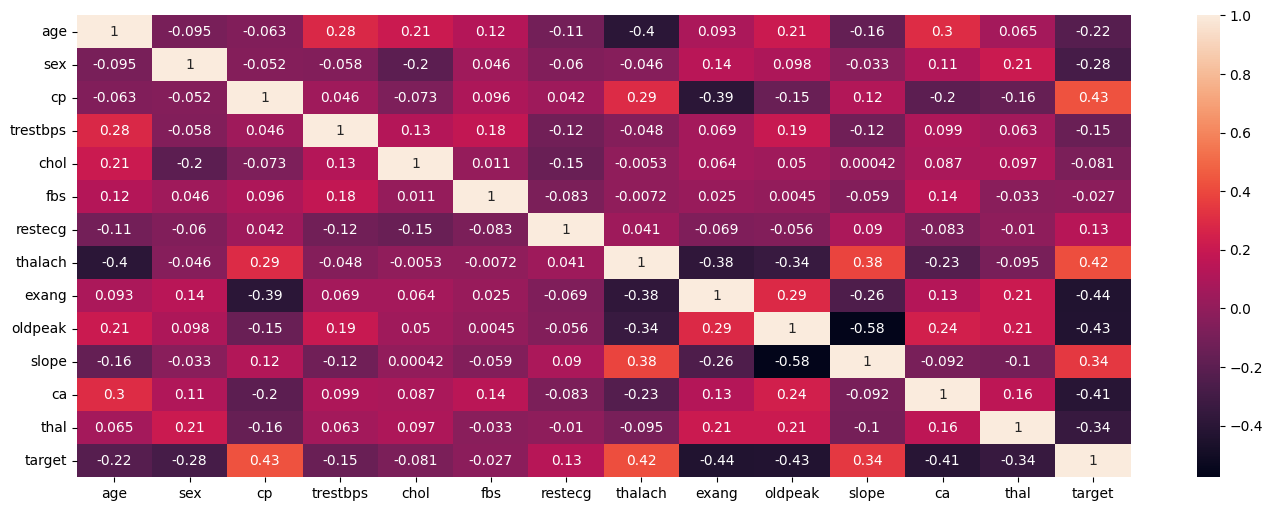

In [14]:
# To check correlation between different features available in our dataset
data.corr()
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

In [15]:
# To check how many people have heart disease and how many peoples don't have heart disease
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

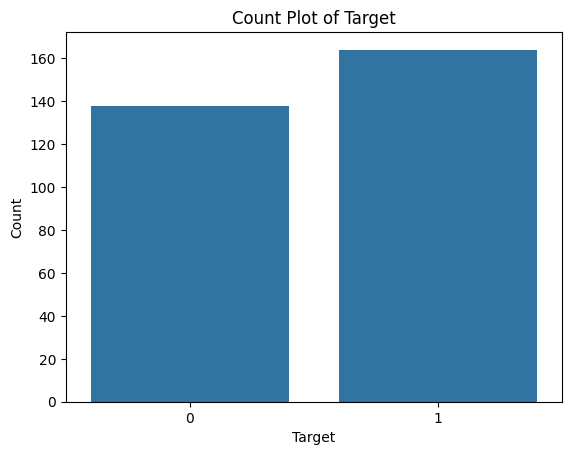

In [17]:
# Assuming data is a DataFrame and 'target' is a column in that DataFrame
sns.countplot(x='target', data=data)

# Optionally, you can set the labels and title for better clarity
plt.xlabel('Target')  # Set the x-axis label
plt.ylabel('Count')   # Set the y-axis label
plt.title('Count Plot of Target')  # Set the plot title

# Display the plot
plt.show()

In [18]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

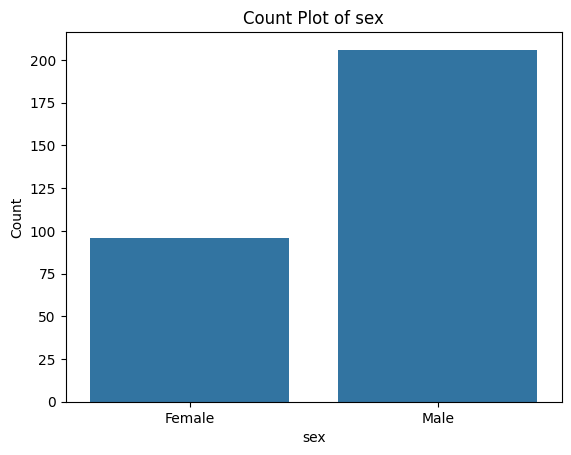

In [20]:
# To find count of male & female in the dataset
sns.countplot(x='sex', data=data)

# Optionally, you can set the labels and title for better clarity
plt.xlabel('sex')  # Set the x-axis label
plt.ylabel('Count')   # Set the y-axis label
plt.title('Count Plot of sex')  # Set the plot title

# Display the plot
plt.xticks([0,1],['Female','Male'])
plt.show()

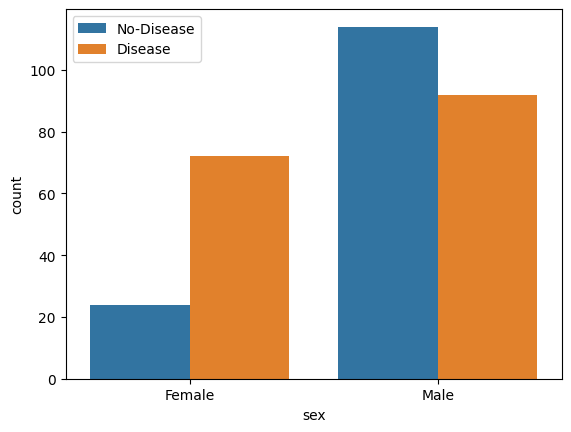

In [21]:
# Finding gender distribution according to the target variable
data.columns
sns.countplot(x='sex',hue="target",data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

C:\Users\mohan\AppData\Local\Temp\ipykernel_15420\3319753275.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],bins=20)


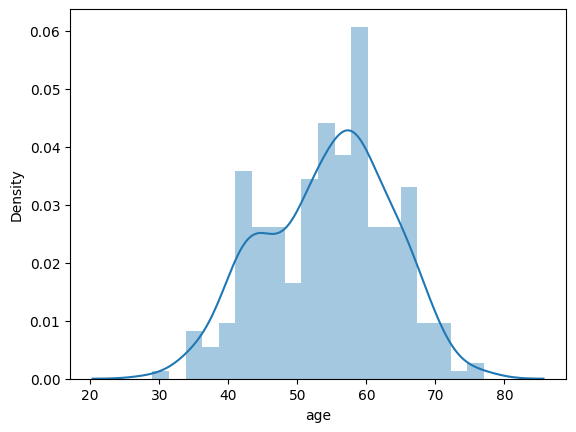

In [22]:
# checking age distribution in the dataset
sns.distplot(data['age'],bins=20)
plt.show()


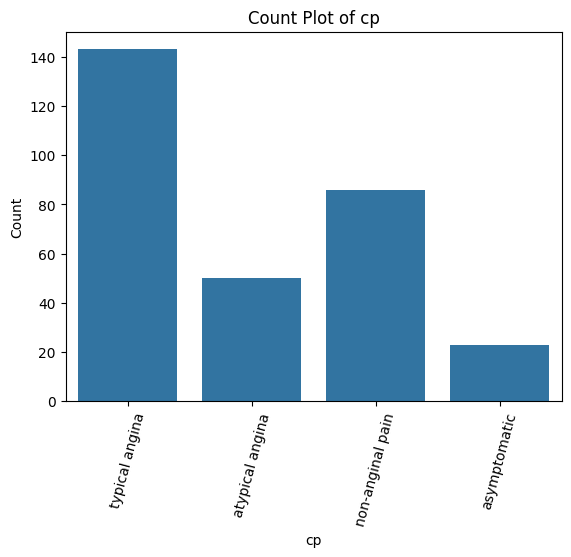

In [24]:
# check pain types
sns.countplot(x='cp', data=data)

# Optionally, you can set the labels and title for better clarity
plt.xlabel('cp')  # Set the x-axis label
plt.ylabel('Count')   # Set the y-axis label
plt.title('Count Plot of cp')  # Set the plot title

# Display the plot
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.xticks(rotation=75)
plt.show()


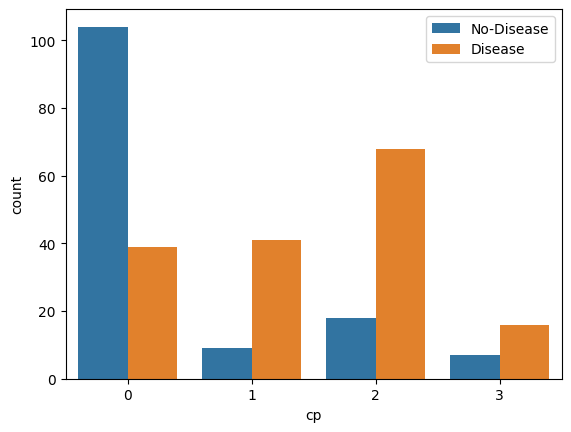

In [25]:
# show the chest pain distribution as per the target variable
data.columns
sns.countplot(x='cp',hue="target",data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()


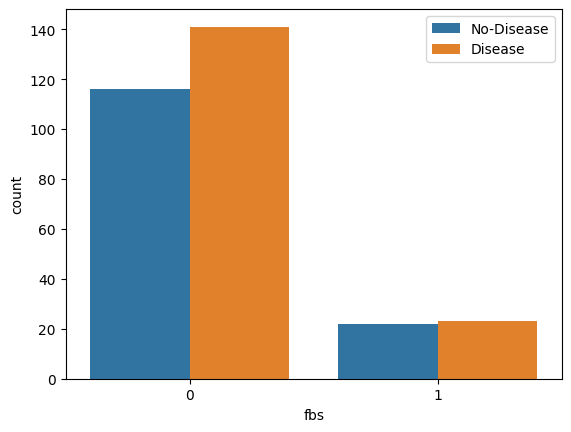

In [26]:
# show fasting blood sugar distribution according to target variable
sns.countplot(x='fbs',hue="target",data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()


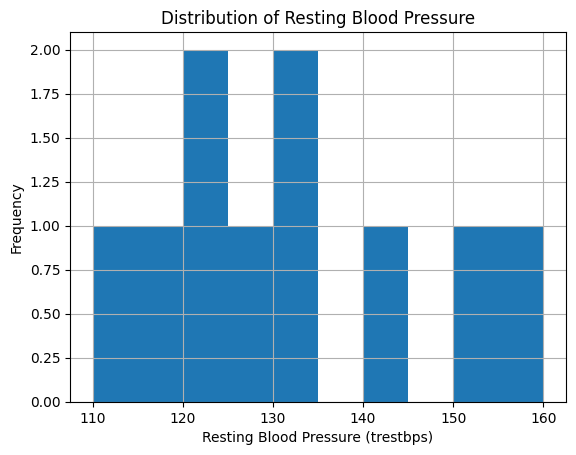

In [27]:
# check resting blood pressure distribution
data.columns
 
data = pd.DataFrame({
    'trestbps': [120, 130, 140, 150, 120, 130, 110, 115, 160, 125]  
})

# Plotting the histogram of the 'trestbps' column
data['trestbps'].hist()

# Setting the labels and title for better clarity
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Frequency')
plt.title('Distribution of Resting Blood Pressure')

# Display the plot
plt.show()
 


C:\Users\mohan\OneDrive\Desktop\IHLab1\Week_3_project\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\mohan\OneDrive\Desktop\IHLab1\Week_3_project\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


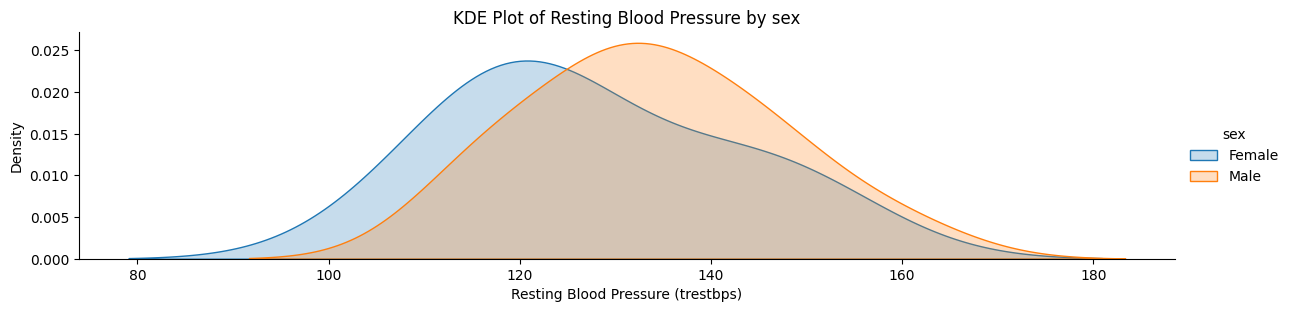

In [32]:
# Compare resting blood pressure as per sex column

data = pd.DataFrame({
    'trestbps': [120, 130, 140, 150, 120, 130, 110, 115, 160, 125, 135, 145, 150, 120, 115, 130, 125, 140, 135, 145],
    'sex': [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]  
            })              # 1 for male, 0 for female
    
 # Create a FacetGrid with hue based on the 'sex' column

g = sns.FacetGrid (data, hue="sex", aspect=4)

# Map a KDE plot for 'trestbps' with shading
g.map(sns.kdeplot, 'trestbps', shade=True)

# Add a legend with the correct labels
g.add_legend(title='sex', labels=['Female', 'Male'])

# Set the labels and title
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Density')
plt.title('KDE Plot of Resting Blood Pressure by sex')

# Display the plot
plt.show()

Index(['chol'], dtype='object')


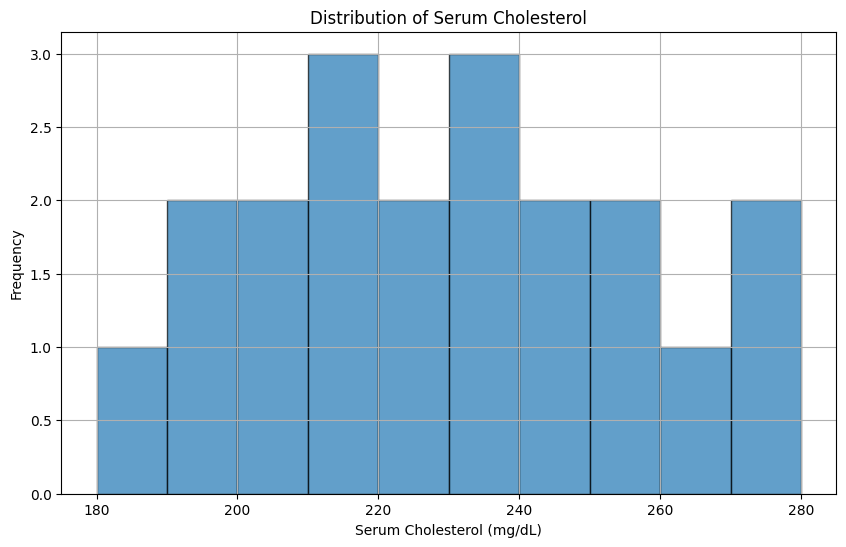

In [29]:
# show distribution of serum cholesterol
data.columns

data = pd.DataFrame({
    'chol': [200, 240, 230, 180, 220, 190, 260, 280, 210, 230, 195, 205, 250, 270, 235, 245, 225, 210, 215, 250]
})

# Verify that the 'chol' column exists
print(data.columns)

# Plot the histogram for 'chol'
plt.figure(figsize=(10, 6))
data['chol'].hist(bins=10, edgecolor='black', alpha=0.7)

# Set labels and title
plt.xlabel('Serum Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.title('Distribution of Serum Cholesterol')

# Show plot
plt.show()
